<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-215: Εφαρμοσμένα Μαθηματικά για Μηχανικούς
## Εαρινό Εξάμηνο 2022-2023
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής
    
## Ανάθεση: 19-3-2023
## Παράδοση (ηλεκτρονικά, όπως αναφέρεται στην ιστοσελίδα του μαθήματος): 
## Σάββατο, 31-3-2023, 23:59:59
<h1><center>Άσκηση 4 [Προαιρετική]</center></h1>

In [25]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import IPython
import numpy as np
np.random.seed(1367) # επειδή χρησιμοποιούμε τυχαίους αριθμούς σε αυτήν την άσκηση, η γραμμή αυτή σας επιτρέπει να έχετε
                     # πάντα τα ίδια αποτελέσματα όταν τρέχετε τον κώδικά σας
%matplotlib inline

Σας δίνεται στο site του μαθήματος ένα σήμα μουσικής $\texttt{sample-noise.wav}$. Πρόκειται για ένα γνωστό τραγούδι "μολυσμένο" με ένα ισχυρό σήμα ημιτόνου σε κάποια υψηλή, σταθερή, συχνότητα μεταξύ $2000$ και $3000$ Hz. Σκοπός της άσκησης είναι να αναλύσετε το σήμα και να αφαιρέσετε το θόρυβο. Ακολουθήστε τα παρακάτω βήματα.

## Άσκηση:

$\left(\alpha'\right)$ Αρχικά, ακούστε το σήμα:

In [26]:
fs, y = wav.read("sample-noise.wav")            # Φορτώνουμε το σήμα μας
IPython.display.Audio("sample-noise.wav")       # Ας το ακούσουμε!

Ας το απεικονίσουμε:

Text(0.5, 1.0, 'Σήμα τραγουδιού')

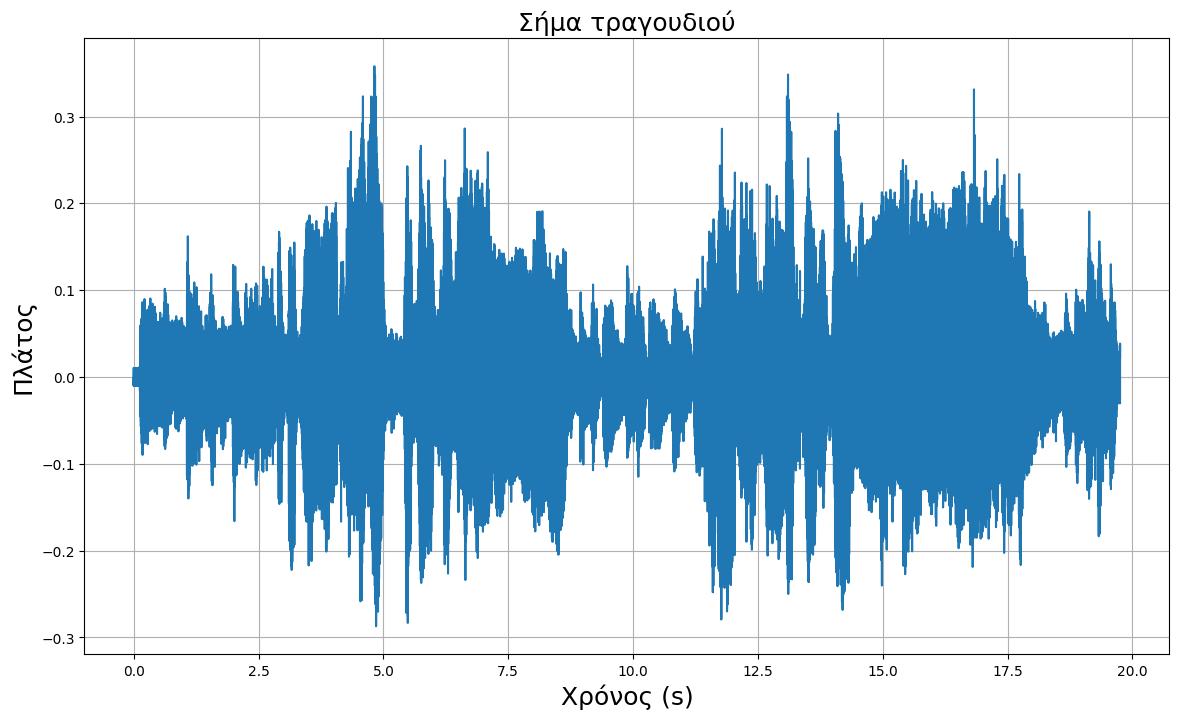

In [27]:
max_nb_bit = float(2 ** (16 - 1))  # Κανονικοποίηση
s = y / (max_nb_bit + 1)           # ---- " -------

t = np.arange(start=0, stop=len(s)/fs, step=1/fs)  # Άξονας του χρόνου (για απεικόνιση)

plt.figure(figsize=(14,8))
plt.plot(t, s)
plt.grid()
plt.xlabel('Χρόνος (s)', fontsize=18)
plt.ylabel('Πλάτος', fontsize=18)
plt.title('Σήμα τραγουδιού', fontsize=18)

$\left(\beta'\right)$ Παρατηρήστε - και ακούστε (κάντε το $2-3$ φορές για να βεβαιωθείτε) - ότι η συνιστώσα του ημιτόνου είναι ισχυρή, και εύκολα διακρίνεται μέσα στον ήχο της ηχογράφησης. Γνωρίζετε όμως ότι λόγω της ισχύος της, θα πρέπει να "ξεχωρίζει" σχετικά στο φάσμα πλάτους του σήματος απο το υπόλοιπο σήμα. Επίσης, επειδή είναι σταθερής συχνότητας συνιστώσα, μπορούμε να την εντοπίσουμε σε κάποια σημεία (παράθυρα) του σήματος (αν δεν επικαλύπτεται από άλλες συχνότητες).

$\left(\gamma'\right)$ Διαλέξτε ένα τυχαίο παράθυρο σήματος, διάρκειας $30$ ms και αναλύστε το στις παραπάνω συχνότητες [$2000, 3000$] Hz με τον μετασχηματισμό Fourier, χρησιμοποιώντας φυσικά το φάσμα πλάτους. Προσπαθήστε να εντοπίσετε το ημίτονο.

Σκεφτείτε ότι ο μετασχηματισμός Fourier του ημιτόνου πλησιάζει τη συνάρτηση Δέλτα που έχει γίνει συνέλιξη με το μετασχηματισμό Fourier του παραθύρου σας. Πρακτικά, θα περιμένετε να δείτε κάποιο ισχυρό peak (κορυφή) στο φάσμα πλάτους. Όμως επειδή το περιεχόμενο του σήματος είναι μουσική και φωνή, το φάσμα πλάτους θα περιέχει και άλλες συχνότητες. Οπότε η αναγνώριση του peak από ένα και μόνο παράθυρο δε θα είναι εύκολη, εκτός αν είστε τυχεροί/ες. 

### Προς διευκόλυνσή σας, δίνεται οτι η συχνότητα που ψάχνετε είναι $\textit{ακέραιος αριθμός}$, ακέραιο πολλαπλάσιο των $100$ Hz, στο διάστημα $[2000, 3000]$ Hz.

Ας πάρουμε ένα τυχαίο παράθυρο και να δούμε τι βρίσκουμε.

**Σημείωση:** Σε σχέση με τις προηγούμενες δυο ασκήσεις Python της σειράς αυτής, στην πραγματική ρέουσα ομιλία και στον ήχο, το σήμα αλλάζει πιο γρήγορα απ΄ ότι όταν λέμε ένα απλό /α/. Έτσι, χρησιμοποιούμε μικρότερο παράθυρο ανάλυσης ($30$ ms αντί για $50$ ms) για να είμαστε σχετικά ασφαλείς ότι το περιεχόμενό του δεν αλλάζει σημαντικά.

Η συχνότητα με το μέγιστο πλάτος στο παράθυρο αυτό είναι η = 2506 Hz


(0.0, 0.00018431007673583733)

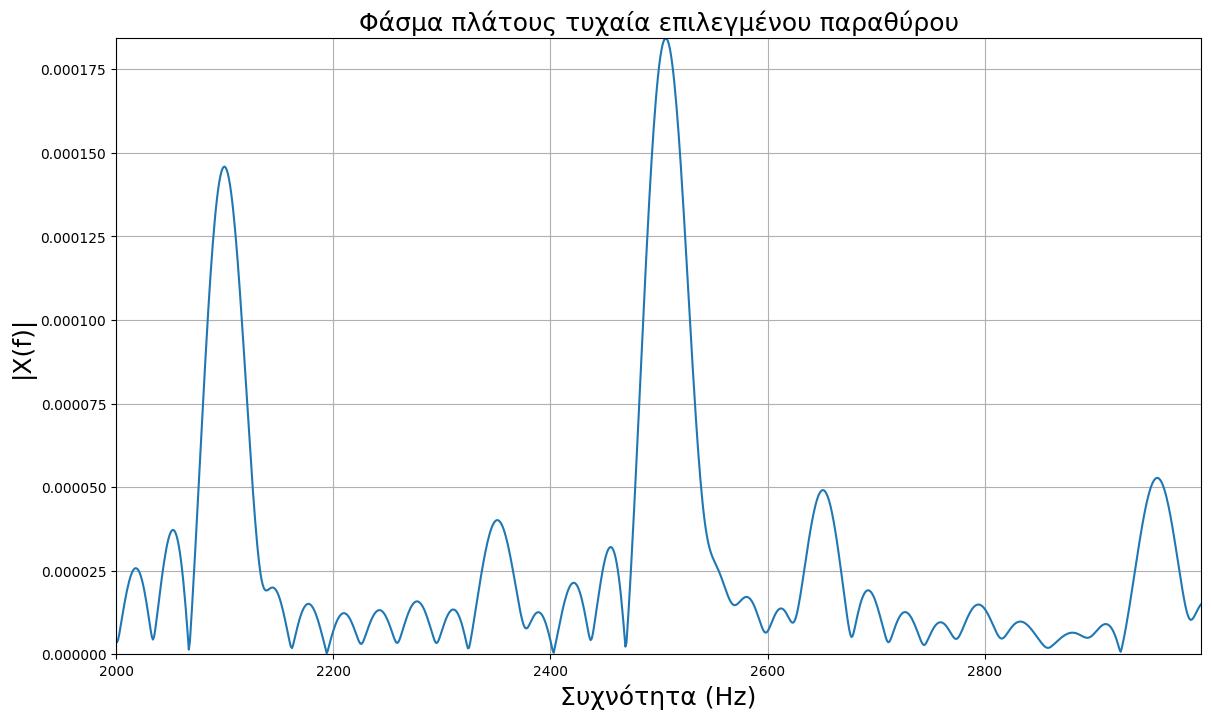

In [28]:
Df = 1
f = np.arange(start=2000, stop=3000, step=Df)                       # Άξονας συχνότητας στο διάστημα [2000,3000) Hz με βήμα 1Hz
ff = np.expand_dims(f, axis=0)                # Επέκταση του άξονα όπως έχουμε δείξει στην 1η άσκηση Python αυτής της σειράς

winlen_ms = 30e-3                             # Διάρκεια παραθύρου σε sec
winlen = int(winlen_ms * fs)                  # Διάρκεια παραθύρου σε δείγματα

t = np.arange(start=0, stop=winlen_ms, step=(1/fs))   # O άξονας του χρόνου, διάρκειας 30ms, με βήμα 1/fs
tt = np.expand_dims(t, axis=0)                        # Επ΄έκταση του αξονα όπως έχουμε δείξει στην 1η άσκηση Python της σειράς

rng_idx = 43484                               # Επιλέγουμε ένα τυχαίο δείγμα για να ξεκινήσουμε την αποκοπή

start = rng_idx                                                    # Η αρχή του παραθύρου μας
stop = start+winlen                                                # Το τέλος του παραθύρου μας
seg = s[int(start) : int(stop)]                                           # Το τυχαίο παράθυρο που επιλέξαμε από το σ΄ήμα s, που ξεκινά
                                                                   # από το δείγμα start και τελειώνει στο δείγμα stop

M = np.exp(-1j * 2 * np.pi * ff.T @ tt)                                             # Πίνακας ανάλυσης Fourier M(f,t)

MF = (1/fs)*seg@M.T                                                # Μετασχ. Fourier

Fasma_Platous = np.abs(MF)                                         # Φάσμα πλάτους

peak_idx = np.argmax(Fasma_Platous)                                # Συχνότητα που αντιστοιχεί στο μέγιστο πλάτος του φάσματος
print(f"Η συχνότητα με το μέγιστο πλάτος στο παράθυρο αυτό είναι η = {f[peak_idx]} Hz") # Εκτύπωση της συχνότητας αυτής

plt.figure(figsize=(14,8))                                         # Γράφημα
plt.plot(f, Fasma_Platous)                                         
plt.xlim([f[0], f[-1]])
plt.grid()
plt.xlabel('Συχνότητα (Hz)', fontsize=18)
plt.ylabel('|X(f)|', fontsize=18)
plt.title('Φάσμα πλάτους τυχαία επιλεγμένου παραθύρου', fontsize=18)
plt.ylim([0, max(Fasma_Platous)])                                  

$\left(\delta'\right)$ Επιλέξτε διάφορα παράθυρα μέσα στο σήμα (ας πούμε $12$), όλα ίδιας διάρκειας, μέχρι να εντοπίσετε τη συχνότητα του ημιτόνου με κάποια βεβαιότητα. Για κάθε plot που κάνετε, μπορείτε να τυπώσετε την μέγιστη τιμή του φάσματος μέσω της συνάρτησης $\texttt{argmax}$ της $\texttt{NumPy}$ η οποία σας επιστρέφει το **index** της μέγιστης αυτής τιμής. Έτσι, μπορείτε να βρίσκετε εύκολα τη συχνότητα ενός σημείου στο φάσμα σας.

Η συχνότητα με το μέγιστο πλάτος είναι η = 2500 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2499 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2499 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2502 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2498 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 3462 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2505 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2499 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2401 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2500 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 2500 Hz
Η συχνότητα με το μέγιστο πλάτος είναι η = 3448 Hz


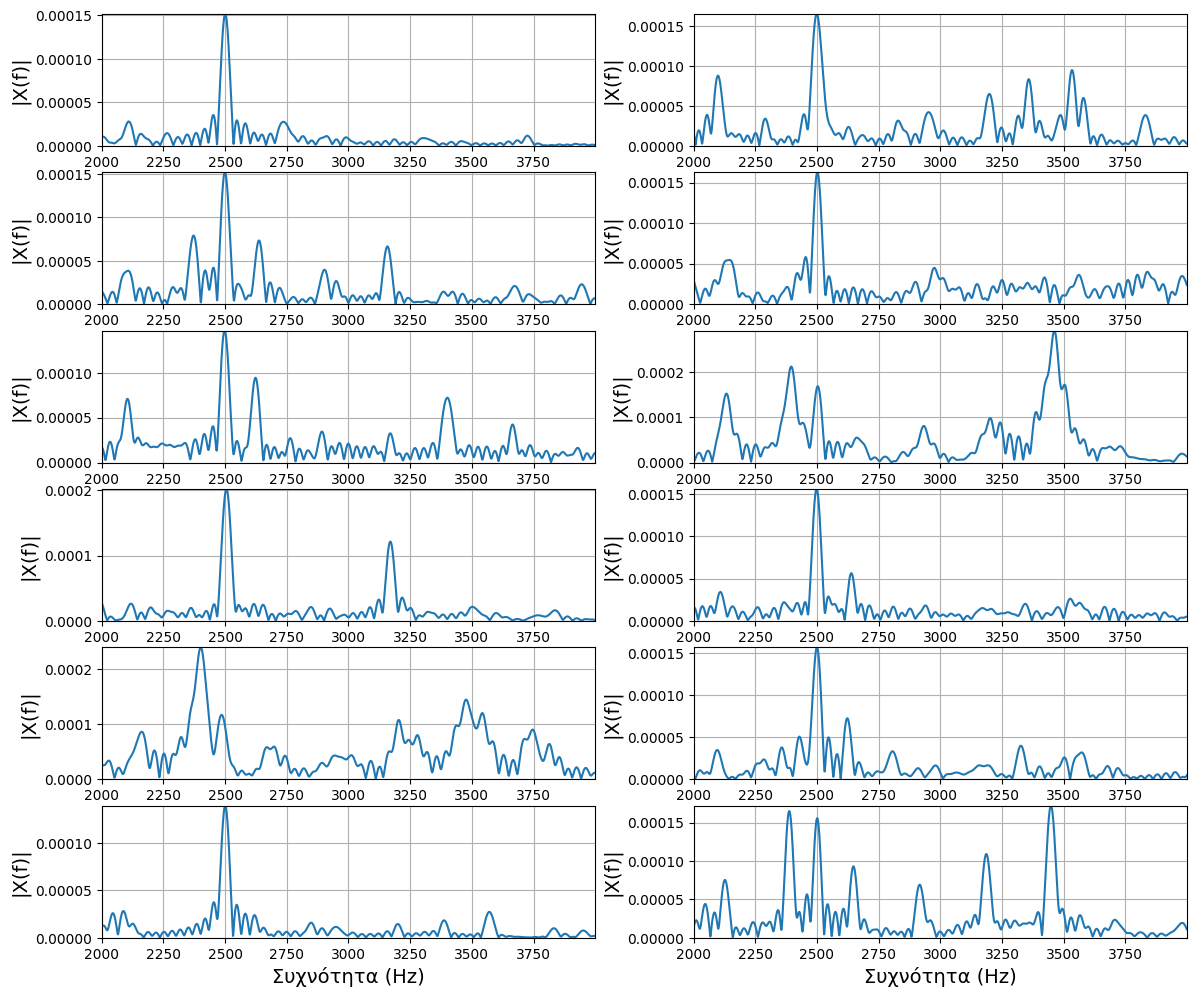

In [29]:
Df = 1
f = np.arange(start=2000, stop=4000, step=Df)                        # Άξονας συχνότητας στο διάστημα [2000,3000) Hz όπως προηγο΄μενως
ff = np.expand_dims(f, axis=0)                # Επέκταση του άξονα όπως έχουμε δείξει στην 1η άσκηση Python αυτής της σειράς

winlen_ms = 30e-3                             # Διάρκεια παραθύρου σε sec
winlen = int(winlen_ms * fs)                   # Διάρκεια παραθύρου σε δείγματα

t = np.arange(start=0, stop=winlen_ms, step=(1/fs))   # O άξονας του χρόνου, διάρκειας 30ms
tt = np.expand_dims(t, axis=0)                        # Επ΄έκταση του αξονα όπως έχουμε δείξει στην 1η άσκηση Python της σειράς

num_windows = 12                              # Πόσα τυχαία παράθυρα θέλουμε να επιλέξουμε? Έστω 12.

Y = np.zeros(shape=(num_windows, len(f)))     # Δέσμευση μνήμης (όπως η calloc στη C)
plt.figure(figsize=(14,12))                   # Γράφημα (δηλώνουμε το μέγεθος από τώρα)

for i in range(num_windows):                  # Για κάθε παράθυρο από τα num_windows...
    # Για να μην επιλέγουμε με το χέρι τα τυχαία τμήματα του σήματος, χρησιμοποιούμε μια γεννήτρια τυχαίων αριθμών
    rng_idx = np.random.randint(low=0, high=len(s)-winlen-1)           # Επιλέγουμε ένα τυχαίο δείγμα για να ξεκινήσουμε 
                                                                       # την αποκοπή. Το τυχαίο δείγμα έχουμε φροντίσει να 
                                                                       # ανήκει στο εύρος δειγμάτων του σήματος μας.

    start = rng_idx                                                    # Η αρχή του παραθύρου μας
    stop = start+winlen                                                # Το τέλος του παραθύρου μας
    seg = s[int(start) : int(stop)]                                           # Το τυχαίο παράθυρο που επιλέαμε, όπως προηγουμένως

    M = np.exp(-1j * 2 * np.pi * ff.T @ tt)                                             # Πίνακας ανάλυσης Fourier M(f,t)
    
    MF = (1/fs)*seg@M.T                                                # Μετασχ. Fourier
    
    Fasma_Platous = np.abs(MF)                                         # Φάσμα πλάτους
    
    peak_idx = np.argmax(Fasma_Platous)                                # Συχνότητα που αντιστοιχεί στο μέγιστο πλάτος του φάσματος
    print(f"Η συχνότητα με το μέγιστο πλάτος είναι η = {f[peak_idx]} Hz") # Εκτύπωση της συχνότητας αυτής

    plt.subplot(num_windows//2, 2, i+1)
    plt.plot(f, Fasma_Platous)                                         
    plt.xlim([f[0], f[-1]])
    plt.grid()
    plt.xlabel('Συχνότητα (Hz)', fontsize=14)
    plt.ylabel('|X(f)|', fontsize=14)
    plt.ylim([0, max(Fasma_Platous)])                          

### Από τα παραπάνω σχήματα και το output του κώδικα, ποιά πιστεύετε ότι είναι η συχνότητα του ημιτόνου που έχει "μολύνει" το σήμα μας? (θυμηθείτε, η συχνότητα που ψάχνουμε είναι ακέραιος αριθμός πολλαπλάσιος του 100!)

### Γράψτε τη σε ένα χαρτί για να τη θυμάστε και χρησιμοποιήστε τη παρακάτω όπου σας ζητηθεί.

$\left(\epsilon'\right)$ Σας δίνουμε επιπλέον ότι το ισχυρό αυτό ημίτονο έχει πλάτος $A = 0.01$ και αρχική φάση $\phi = 0$, δηλ. είναι της μορφής:

$$\large n(t) = A\cos\left(2\pi f_0 t + \phi \right) = 0.01\cos\left(2\pi f_0 t\right)$$

με $f_0$ τη **συχνότητα που γράψατε στο χαρτί σας παραπάνω**.

Δημιουργήστε ένα ημίτονο στην $\texttt{Python}$ με πλάτος και φάση που σας δίνεται παραπάνω, και με συχνότητα αυτήν που βρήκατε από την ανάλυσή σας στο προηγούμενο ερώτημα. Φροντίστε να έχει ίδια διάρκεια με ολόκληρο το σήμα s του τραγουδιού. Για να βρείτε τη διάρκεια αυτή, χρησιμοποιήστε τη συνάρτηση $\texttt{len}()$. 

In [30]:
# Ημίτονο-toy
# Για παράδειγμα, αν θέλετε να φτιάξετε ενα ημίτονο διάρκειας 100 δειγμάτων, 
# δηλ. 100/16000 = 0.00625 s (με συχνότητα δειγματοληψίας $16000$ Hz), πλάτους 1 
# και συχνότητας 200 Hz, θα κάνετε το εξής :
A = 1
f0 = 200
ffs = 16000
n_toy = A*np.cos(2*np.pi*(f0/ffs)*np.arange(100))


# Φτιάξτε εδώ το δικό σας ημίτονο, οπως ζητήθηκε παραπάνω:
A = 0.01
f0 = 2500  #approximately
ffs = 16000
n = A*np.cos(2*np.pi*(f0/ffs)*np.arange(len(s)))

$\left(\sigma\tau'\right)$ Αφαιρέστε το σήμα ημιτόνου που φτιάξατε παραπάνω από το σήμα της ηχογράφησης s, απλώς αφαιρώντας μεταξύ τους το διάνυσμα s και το διάνυσμα ημιτόνου που μόλις φτιάξατε, όπως παρακάτω. Ακούστε το αποτέλεσμα. Θα πρέπει να ακούγεται πλέον καθαρό το σήμα.

In [31]:
IPython.display.Audio(s, rate=ffs)  # Πριν τον καθαρισμό

In [32]:
clean_sig = s - n
IPython.display.Audio(clean_sig, rate=ffs)  # Μετά τον καθαρισμό

**Σημείωση**: Το παραπάνω παράδειγμα ήταν πολύ "εκπαιδευτικό" :). Στην πράξη, το ημίτονο μπορεί να μην έχει σταθερό πλάτος ή μηδενική φάση, ή ακόμα κι αν έχει, δεν μπορούμε να γνωρίζουμε εκ των προτέρων τις τιμές τους. Έτσι, μια μέθοδος όπως η παραπάνω, στο πεδίο του χρόνου δηλαδή, δε ϑα δουλέψει. Συνήθως χρησιμοποιούμε μεθόδους στο χώρο της συχνότητας για να αφαιρέσουμε τον ενοχλητικό θόρυβο, εφαρμόζοντας τα λεγόμενα **notch φίλτρα**, τα οποία είναι συστήματα που μηδενίζουν το πλάτος μιας συγκεκριμένης συχνότητας από ένα σήμα που δέχονται ως είσοδο. Η εφαρμογή μιας τέτοιας τεχνικής ξεφεύγει από τα πλαίσια του μαθήματος$^1$.


$^1$ Είναι αντικείμενο του μαθήματος *ΗΥ370-Ψηφιακή Επεξεργασία Σήματος*.

### ΠΡΟΣΟΧΗ: Το παραδοτέο αρχείο σας πρέπει να έχει όλα τα κελιά εκτελεσμένα! 

### Τρέξτε κάθε κελί του αρχείου, σώστε το, και καταθέστε το με τον τρόπο που περιγράφεται στην ιστοσελίδα.